<a href="https://colab.research.google.com/github/nadhybrandao/Atividades_Praticas_WoMarkersCode/blob/main/WoMakersCode_Correla%C3%A7%C3%A3o_e_Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

Sugestões de bibliotecas para serem utilizadas:
Pandas, NumPy, Seaborn, Matplotlib, Statsmodels, Scipy

Considerando a base de dados kc_house_data.csv responda as questões de 1
a 6 abaixo:
1. Codifique e exiba a matriz de correlação entre as variáveis numéricas. Além disso, qual é a correlação entre o preço price e o número de quartos bedrooms? Existe alguma diferença na correlação quando consideramos apenas casas com uma área total sqft_living superior a 2000 pés quadrados?
2. Existe alguma correlação entre o preço price e a área total da casa sqft_living, considerando apenas casas com pelo menos dois banheiros bathrooms?
3. Como a quantidade de banheiros bathrooms influencia na correlação entre a área total da casa sqft_living e o preço price?
4. Qual é a relação entre a condição da casa condition e o preço price, considerando apenas casas com uma área total sqft_living superior a 3000 pés quadrados?
5. Existe alguma correlação entre a localização geográfica lat e long e o preço price para casas com pelo menos três quartos bedrooms?
6. Calcule a correlação entre uma variável categórica(waterfront) e uma variável numérica(price) usando ANOVA.


Considerando a base de dados car_price.csv responda as questões de 7 a 11
abaixo:
7. Codifique e exiba a Matriz de correlação para as variáveis numéricas e dê exemplos de correlações positivas, negativas e neutras.
8. Codifique e exiba Gráficos de Dispersão para cada uma das variáveis numéricas em relação à variável de interesse Price.
9. Crie um modelo de Regressão Linear Simples, exiba a Tabela de Regressão e exiba o plot da Reta Estimada.
10. Codifique e exiba o gráfico dos resíduos do modelo de Regressão Simples.
11. Crie um modelo de Regressão Multivariada, exiba a Tabela de Regressão e exiba o gráfico dos resíduos do modelo.




In [ ]:
# Carregar a base de dados
data = pd.read_csv('kc_house_data.xls')
print(data.head())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0          n     0  ...      7        1180              0   
1      7242     2.0          n     0  ...      7        2170            400   
2     10000     1.0          n     0  ...      6         770              0   
3      5000     1.0          n     0  ...      7        1050            910   
4      8080     1.0          n     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sq

# Questão 01

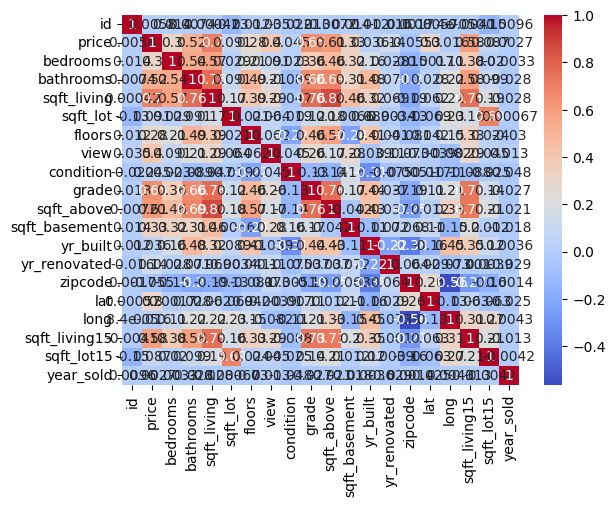

Correlação entre price e bedrooms: 0.29920721616918206
Correlação entre price e bedrooms (sqft_living > 2000): 0.11912115548964147


In [ ]:
# Exibir a matriz de correlação
# Convert 'date' column to datetime objects
data['date'] = pd.to_datetime(data['date'])

# Extract year from the date
data['year_sold'] = data['date'].dt.year

# Select only numerical columns for correlation
numerical_data = data.select_dtypes(include=['number'])

# Calculate correlation matrix for numerical columns
correlation_matrix = numerical_data.corr()

# Plot correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

# Correlação entre preço e número de quartos
corr_price_bedrooms = data['price'].corr(data['bedrooms'])
print(f'Correlação entre price e bedrooms: {corr_price_bedrooms}')

# Filtrar casas com área total maior que 2000 sqft
filtered_data = data[data['sqft_living'] > 2000]
corr_price_bedrooms_filtered = filtered_data['price'].corr(filtered_data['bedrooms'])
print(f'Correlação entre price e bedrooms (sqft_living > 2000): {corr_price_bedrooms_filtered}')

# Questão 02

In [ ]:
# Filtrar casas com pelo menos 2 banheiros
filtered_bathrooms = data[data['bathrooms'] >= 2]

# Correlação entre preço e área total
corr_price_sqft_living = filtered_bathrooms['price'].corr(filtered_bathrooms['sqft_living'])
print(f'Correlação entre price e sqft_living (banheiros >= 2): {corr_price_sqft_living}')

Correlação entre price e sqft_living (banheiros >= 2): 0.7067107107996193


# Questão 03

In [ ]:
# Verificar a correlação para diferentes quantidades de banheiros
bathroom_groups = data.groupby('bathrooms').apply(lambda x: x['price'].corr(x['sqft_living']))
print(bathroom_groups)

bathrooms
0.00    0.916837
0.50         NaN
0.75    0.357178
1.00    0.359529
1.25    0.167331
1.50    0.423405
1.75    0.449225
2.00    0.446945
2.25    0.598274
2.50    0.559945
2.75    0.522397
3.00    0.569033
3.25    0.544659
3.50    0.566392
3.75    0.465538
4.00    0.584480
4.25    0.444766
4.50    0.796040
4.75    0.649359
5.00    0.747219
5.25    0.901217
5.50    0.411625
5.75    1.000000
6.00    1.000000
6.75    1.000000
7.50         NaN
7.75         NaN
8.00         NaN
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
<ipython-input-11-2c41c1de7461>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bathroom_groups = data.groupby('bathrooms').apply(lambda x: x['price'].corr(x['sqft_living']))


# Questão 04

In [ ]:
# Filtrar casas com área total maior que 3000 sqft
large_houses = data[data['sqft_living'] > 3000]

# Correlação entre condição da casa e preço
corr_condition_price = large_houses['condition'].corr(large_houses['price'])
print(f'Correlação entre condition e price (sqft_living > 3000): {corr_condition_price}')


Correlação entre condition e price (sqft_living > 3000): 0.10527844723732609


# Questão 05

In [ ]:
# Filtrar casas com pelo menos 3 quartos
three_bedroom_houses = data[data['bedrooms'] >= 3]

# Correlação entre localização geográfica e preço
corr_lat_price = three_bedroom_houses['lat'].corr(three_bedroom_houses['price'])
corr_long_price = three_bedroom_houses['long'].corr(three_bedroom_houses['price'])
print(f'Correlação entre lat e price: {corr_lat_price}')
print(f'Correlação entre long e price: {corr_long_price}')

Correlação entre lat e price: 0.31255514248432165
Correlação entre long e price: -0.0072753069929269365


# Questão 06

In [ ]:
# Teste ANOVA para waterfront e preço
anova_result = stats.f_oneway(data[data['waterfront'] == 0]['price'],
                              data[data['waterfront'] == 1]['price'])
print(f'Valor F e p-valor do teste ANOVA: {anova_result}')


Valor F e p-valor do teste ANOVA: F_onewayResult(statistic=nan, pvalue=nan)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


# Questão 07

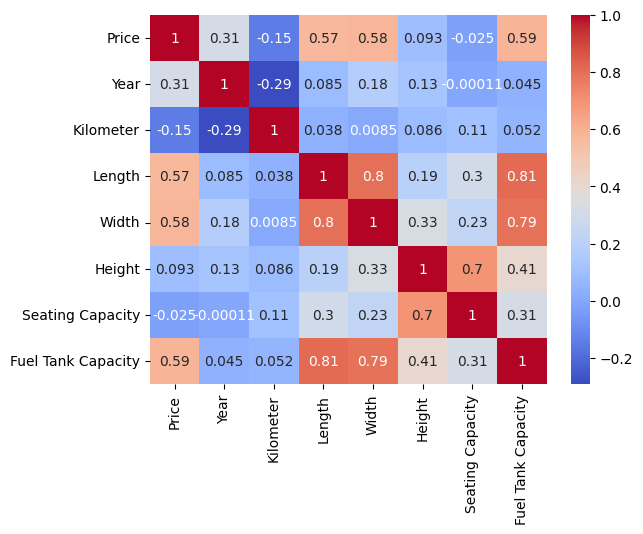

In [ ]:
car_data = pd.read_csv('car_price.xls')
numerical_features = car_data.select_dtypes(include=['number'])
correlation_matrix_car = numerical_features.corr()
sns.heatmap(correlation_matrix_car, annot=True, cmap="coolwarm")
plt.show()

# Questão 08

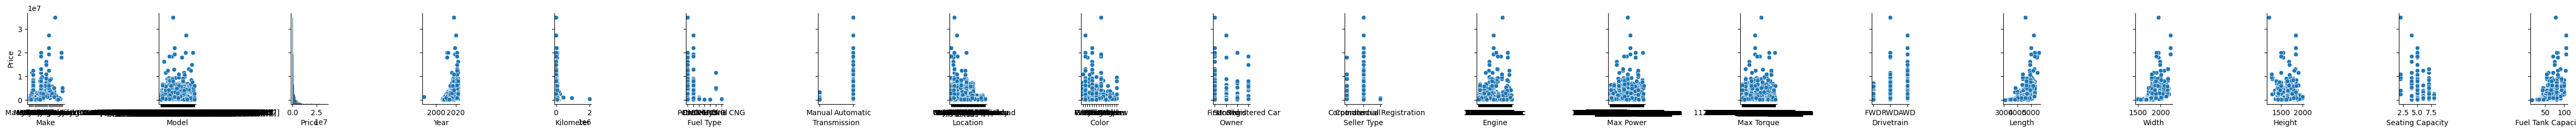

In [ ]:
# Pairplot para variáveis numéricas em relação a Price
sns.pairplot(car_data, x_vars=car_data.columns, y_vars=['Price'], kind='scatter')
plt.show()

# Questão 09

In [ ]:
if 'EngineSize' not in car_data.columns:
    try:
        car_data['EngineSize'] = car_data['Engine'].str.extract('(\d+)', expand=False).astype(float)
        print("EngineSize column created from 'Engine' column.")
    except (AttributeError, KeyError):
        raise KeyError(f"Column 'Engine' or 'EngineSize' not found. Unable to create EngineSize column. Available columns: {car_data.columns.tolist()}")
else:
    X = car_data['EngineSize']

X = car_data['EngineSize']
y = car_data['Price']

EngineSize column created from 'Engine' column.


# Questão 10

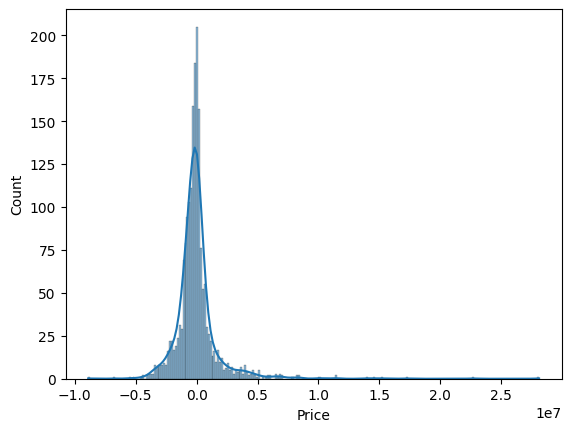

In [ ]:
model = LinearRegression()
model.fit(X.values.reshape(-1, 1), y)

residuals = y - model.predict(X.values.reshape(-1, 1))

sns.histplot(residuals, kde=True)
plt.show()

# Questão 11

In [ ]:
print(car_data.columns)

car_data = car_data.rename(columns={'OriginalColumnName': 'Horsepower', 'AnotherColumnName': 'Weight'})

car_data['Horsepower'] = car_data['Max Power']

required_columns = ['EngineSize', 'Horsepower', 'Weight']
missing_columns = [col for col in required_columns if col not in car_data.columns]

Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
       'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity', 'EngineSize', 'Horsepower'],
      dtype='object')
